In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import os
import ketu
import numpy as np
import matplotlib.pyplot as pl

/home/dfm/anaconda/lib/python2.7/site-packages/astropy/config/configuration.py:682: ConfigurationMissingWarning: Configuration defaults will be used due to OSError:Could not find unix home directory to search for astropy config dir on None
  warn(ConfigurationMissingWarning(msg))


## Data

First, we'll download the light curve and PCA basis file:

In [3]:
campaign = 1
epicid = "201912552"
basepath = "/export/bbq2/dfm/k2/web"
light_curve_file = os.path.join(basepath, "lightcurves/c{0}".format(campaign),
                                "{0}00000/{1}000/ktwo{2}-c{3:02d}_lpd-lc.fits"
                                .format(epicid[:4], epicid[4:6], epicid, campaign))

query = dict(
    light_curve_file=light_curve_file,
    basis_file=os.path.join(basepath, "elcs/c{0}-norm.h5".format(campaign)),
    catalog_file=os.path.join(basepath, "catalogs/epic.h5"),
    nbasis=150,
    initial_time=0.0,  # 2015.,
    skip=10000,
    durations=[0.05, 0.1, 0.2],
    min_period=5.,
    max_period=50.,
    npeaks=1,
    # use_gp=False,
)

In [4]:
pipe = ketu.k2.Data(cache=False)
pipe = ketu.k2.Likelihood(pipe, cache=False)
# pipe = ketu.OneDSearch(pipe, cache=True)
# pipe = ketu.IterativeTwoDSearch(pipe, cache=True)

In [5]:
r = pipe.query(**query)

Querying Data
Finished querying Data in 0.70s
Querying Likelihood
tau = 5.86090087891
tau = 5.86090087891
tau = 7.80773925781
tau = 7.80773925781
Finished querying Likelihood in 0.95s


In [7]:
lcs[0].m

array([False,  True, False, ..., False, False, False], dtype=bool)

948


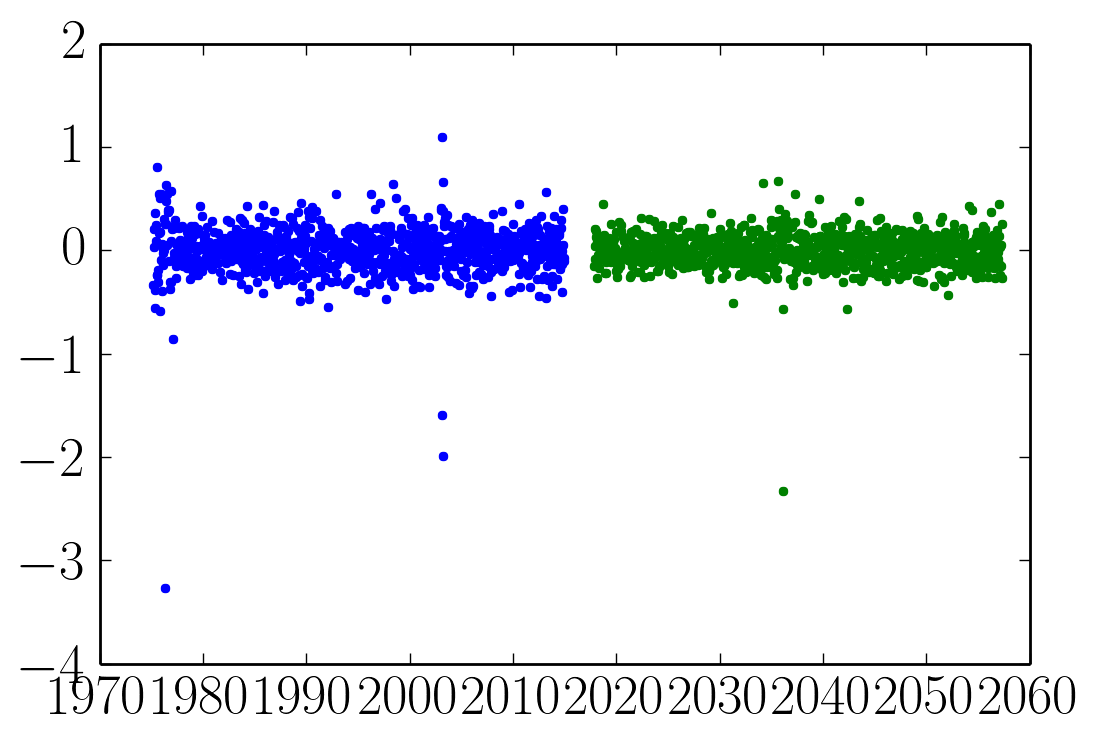

In [6]:
lcs = r.model_light_curves
print(len(lcs[0].time))
[pl.plot(lc.time, lc.flux - lc.predict(), ".") for lc in lcs];

In [45]:
r.peaks

[{'depth': 4.3037995012368562,
  'depth_ivar': 99.10437708432805,
  'duration': 0.1,
  'period': 26.015645374119224,
  's2n': 42.844832464712169,
  't0': 1.277852405369341}]